## 스타벅스, 이디야 위치 분석하기

* 이디야는 스타벅스 근처에 입점한다는 설이 있습니다. 과연 이디야와 스타벅스의 매장입지는 얼마나 차이가 날까요? 관련 기사를 읽고 구별로 이디야와 스타벅스의 매장을 기사와 유사하게 분석하고 시각화 해보면서 Python, Pandas, Numpy, Seaborn, Matplotlib, folium 을 통해 다양한 방법으로 표현해 봅니다.

### 다루는 내용
* 공공데이터를 활용해 텍스트 데이터 정제하고 원하는 정보 찾아내기
* 문자열에서 원하는 텍스트 추출하기
* 문자열을 활용한 다양한 분석 방법과 위치 정보 사용하기
* folium을 통한 위경도 데이터 시각화

### 데이터셋
- 소상공인시장진흥공단_상가(상권)정보
    - https://www.data.go.kr/data/15083033/fileData.do 에서 다운로드
    - 소상공인시장진흥공단_상가(상권)정보_20240930.zip 에서 소상공인시장진흥공단_상가(상권)정보_서울_202409.csv 만 사용

In [2]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.9.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.9.2-cp311-cp311-win_amd64.whl (7.8 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 17.9 MB/s eta 0:00:00
Using cached kiwisolver-1.4.7-cp311-cp311-win_amd64.whl (56 kB)
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 29.2 MB/s eta 0:00:00
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# 데이터 분석을 위해 pandas를, 수치계산을 위해 numpy를, 시각화를 위해 seaborn을 불러옵니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [52]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

sns.set_theme(style='darkgrid', palette='deep', font='NanumGothic')

In [4]:
font_path = 'C:/Windows/fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [5]:
# 음수 마이너스표시가 깨질때
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

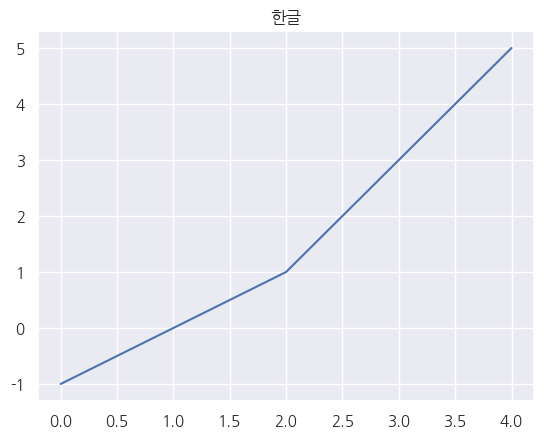

In [54]:
# 한글폰트와 마이너스 폰트 설정 확인
pd.Series([-1, 0, 1, 3, 5]).plot(title="한글")

plt.show()

In [62]:
# 파일을 불러와 df 라는 변수에 담습니다.
# shape 를 통해 불러온 csv 파일의 크기를 확인합니다.
df = pd.read_csv('./data/소상공인시장진흥공단_상가(상권)정보_서울_202409.csv', encoding='utf-8', index_col=0)
df.shape

C:\Users\perso\AppData\Local\Temp\ipykernel_21852\436914580.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/소상공인시장진흥공단_상가(상권)정보_서울_202409.csv', encoding='utf-8', index_col=0)


(466022, 38)

In [15]:
# 파일을 불러와 df 라는 변수에 담습니다.
# shape 를 통해 불러온 csv 파일의 크기를 확인합니다.
df = pd.read_csv('./data/shop_info_in_cafe.csv', encoding='utf-8', index_col=0)
df.shape

(1049, 13)

In [63]:
df.head()

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
상가업소번호,,,,,,,,,,,,,,,,,,,,,
MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,사진 처리업,...,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117
MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,...,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053
MA010120220805430797,가배차,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,...,1171010400101430002012823,사이언스빌딩,서울특별시 송파구 가락로 209,138852,5663,NaN,1,NaN,127.116136,37.507170
MA010120220805430812,비에이치씨항동점,NaN,I2,음식,I210,기타 간이,I21006,치킨,I56193,치킨 전문점,...,1153011200101000005000001,항동중흥에스클래스베르데카운티,서울특별시 구로구 연동로 233,152140,8362,NaN,1,NaN,126.820686,37.481640
MA010120220805430834,무지개삼성약국,NaN,G2,소매,G215,의약·화장품 소매,G21501,약국,G47811,의약품 및 의료용품 소매업,...,1168011400106840005002734,대훈빌딩,서울특별시 강남구 일원로 45,135516,6343,NaN,NaN,NaN,127.081499,37.489893


In [64]:
# 정보보기
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466022 entries, MA0101202210A0093845 to MA0101202406A0459708
Data columns (total 38 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상호명        466022 non-null  object 
 1   지점명        11406 non-null   object 
 2   상권업종대분류코드  466022 non-null  object 
 3   상권업종대분류명   466022 non-null  object 
 4   상권업종중분류코드  466022 non-null  object 
 5   상권업종중분류명   466022 non-null  object 
 6   상권업종소분류코드  466022 non-null  object 
 7   상권업종소분류명   466022 non-null  object 
 8   표준산업분류코드   465931 non-null  object 
 9   표준산업분류명    465931 non-null  object 
 10  시도코드       466022 non-null  int64  
 11  시도명        466022 non-null  object 
 12  시군구코드      466022 non-null  int64  
 13  시군구명       466022 non-null  object 
 14  행정동코드      466022 non-null  int64  
 15  행정동명       466022 non-null  object 
 16  법정동코드      466022 non-null  int64  
 17  법정동명       466022 non-null  object 
 18  지번코드       466022 non-null  int64  


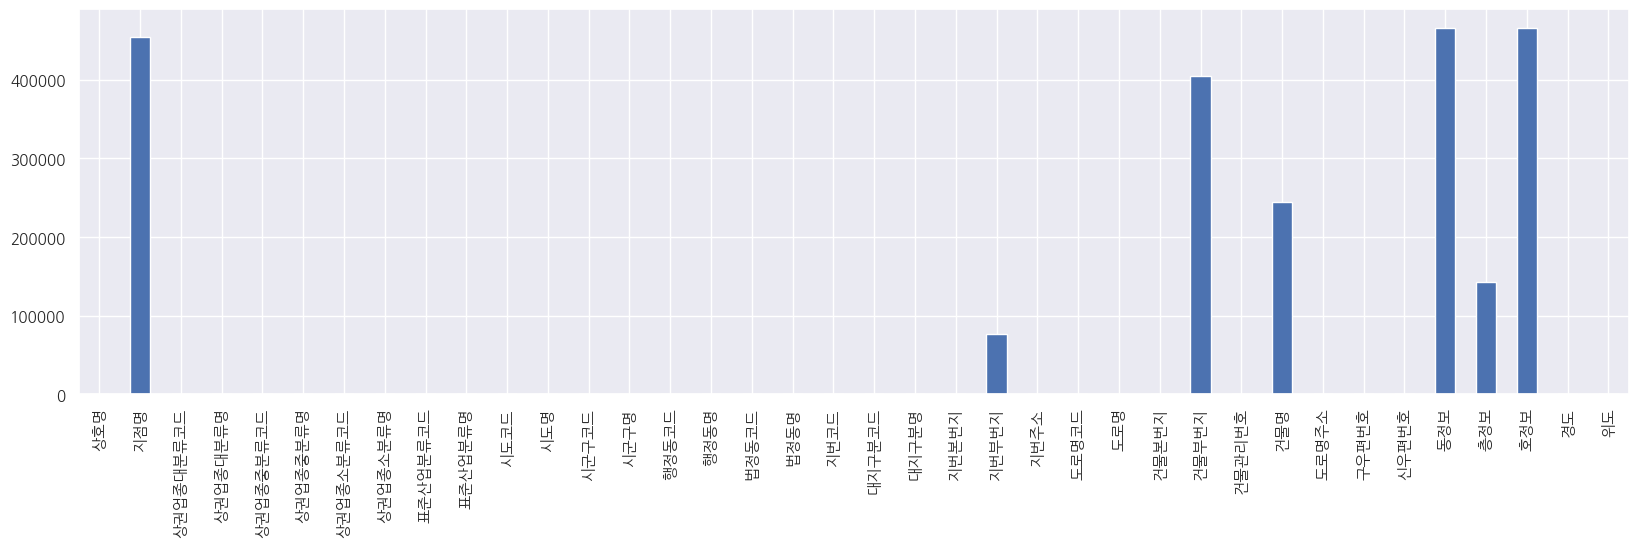

In [65]:
# 결측치보기
df.isnull().sum().plot.bar(figsize=(20,5))

plt.show()

In [66]:
# 사용할 컬럼만 따로 모음
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']

df = df[columns].copy()
df.shape

(466022, 11)

In [67]:
# 제거 후 메모리 사용량 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466022 entries, MA0101202210A0093845 to MA0101202406A0459708
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       466022 non-null  object 
 1   상권업종대분류명  466022 non-null  object 
 2   상권업종중분류명  466022 non-null  object 
 3   상권업종소분류명  466022 non-null  object 
 4   시도명       466022 non-null  object 
 5   시군구명      466022 non-null  object 
 6   행정동명      466022 non-null  object 
 7   법정동명      466022 non-null  object 
 8   도로명주소     466022 non-null  object 
 9   경도        466022 non-null  float64
 10  위도        466022 non-null  float64
dtypes: float64(2), object(9)
memory usage: 42.7+ MB


In [68]:
# 서울만 따로 추출
df_seoul = df[df['시도명'] == '서울특별시'].copy()
df_seoul.shape

(466022, 11)

In [69]:
df_seoul.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
상가업소번호,,,,,,,,,,,
MA0101202210A0093845,이상한스냅,과학·기술,사진 촬영,사진촬영업,서울특별시,양천구,신월5동,신월동,서울특별시 양천구 월정로 283,126.828832,37.542117
MA010120220805430767,토끼정,음식,한식,백반/한정식,서울특별시,강서구,가양1동,마곡동,서울특별시 강서구 마곡동로 55,126.833022,37.560053
MA010120220805430797,가배차,음식,한식,백반/한정식,서울특별시,송파구,송파1동,송파동,서울특별시 송파구 가락로 209,127.116136,37.507170
MA010120220805430812,비에이치씨항동점,음식,기타 간이,치킨,서울특별시,구로구,항동,항동,서울특별시 구로구 연동로 233,126.820686,37.481640
MA010120220805430834,무지개삼성약국,소매,의약·화장품 소매,약국,서울특별시,강남구,일원1동,일원동,서울특별시 강남구 일원로 45,127.081499,37.489893


In [70]:
# "상호명_소문자" 컬럼을 만듭니다.
df_seoul['상호명_소문자'] = df_seoul['상호명'].str.lower()

In [71]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('이디야|이디아|ediya'), '상호명_소문자'].shape

(521,)

In [72]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks'), '상호명_소문자'].shape

(3,)

In [76]:
df_cafe = df_seoul[
    df_seoul['상호명_소문자'].str.contains('이디야|이디아|ediya')].copy()
df_cafe.shape

(521, 12)

In [ ]:
df_cafe = df_seoul[
    df_seoul['상호명_소문자'].str.contains('이디야|이디아|ediya')].copy()
df_cafe.shape

(1049, 12)

In [77]:
df_cafe.loc[df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "스타벅스"
df_cafe.loc[~df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "이디야"
df_cafe[["상호명_소문자", "브랜드명"]].head()

,상호명_소문자,브랜드명
상가업소번호,,
MA010120220805434517,이디야까치산로점,이디야
MA010120220805533853,이디야커피하월곡동점,이디야
MA010120220805536396,앙크인베스트먼트이디야커피국회대로점,이디야
MA010120220805528646,이디야화곡본동,이디야
MA010120220805832680,이디야망리단길점,이디야


In [78]:
df_cafe['브랜드명'].isnull().sum()

np.int64(0)

In [79]:
df_cafe[["상호명_소문자", "브랜드명"]].tail()

,상호명_소문자,브랜드명
상가업소번호,,
MA0101202406A0074296,이디야커피가락,이디야
MA0106202404A0056680,이디야용산,이디야
MA0101202406A0031920,이디야등촌3동성당점,이디야
MA0101202406A0453403,이디야커피중계,이디야
MA0101202406A0479933,이디야천호1동점,이디야


In [85]:
df_cafe.reset_index(inplace=True)

In [86]:
df_cafe.tail()

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
516,MA0101202406A0074296,이디야커피가락,음식,비알코올,카페,서울특별시,송파구,가락본동,가락동,서울특별시 송파구 송이로 87,127.120775,37.498338,이디야커피가락,이디야
517,MA0106202404A0056680,이디야용산,음식,비알코올,카페,서울특별시,용산구,한강로동,한강로3가,서울특별시 용산구 한강대로 52-1,126.964637,37.525419,이디야용산,이디야
518,MA0101202406A0031920,이디야등촌3동성당점,음식,비알코올,카페,서울특별시,강서구,등촌3동,등촌동,서울특별시 강서구 강서로56길 110,126.844857,37.558863,이디야등촌3동성당점,이디야
519,MA0101202406A0453403,이디야커피중계,음식,비알코올,카페,서울특별시,노원구,중계본동,중계동,서울특별시 노원구 중계로14바길 2,127.082558,37.649874,이디야커피중계,이디야
520,MA0101202406A0479933,이디야천호1동점,음식,비알코올,카페,서울특별시,강동구,천호1동,천호동,서울특별시 강동구 구천면로34길 43,127.133575,37.542539,이디야천호1동점,이디야


In [88]:
df_ediya = df_cafe[['상호명', '시군구명', '도로명주소', '위도', '경도']]

In [90]:
df_ediya.head()

,상호명,시군구명,도로명주소,위도,경도
0,이디야까치산로점,강서구,서울특별시 강서구 까치산로 182,37.553302,126.853872
1,이디야커피하월곡동점,성북구,서울특별시 성북구 오패산로 16,37.603643,127.037474
2,앙크인베스트먼트이디야커피국회대로점,영등포구,서울특별시 영등포구 국회대로72길 4,37.530326,126.919901
3,이디야화곡본동,강서구,서울특별시 강서구 까치산로4길 11,37.542215,126.844242
4,이디야망리단길점,마포구,서울특별시 마포구 포은로 81-1,37.554303,126.905250


In [105]:
df_ediya.columns = ['매장명', '구', '주소', '위도', '경도']

In [106]:
df_ediya.head()

,매장명,구,주소,위도,경도
0,이디야까치산로점,강서구,서울특별시 강서구 까치산로 182,37.553302,126.853872
1,이디야커피하월곡동점,성북구,서울특별시 성북구 오패산로 16,37.603643,127.037474
2,앙크인베스트먼트이디야커피국회대로점,영등포구,서울특별시 영등포구 국회대로72길 4,37.530326,126.919901
3,이디야화곡본동,강서구,서울특별시 강서구 까치산로4길 11,37.542215,126.844242
4,이디야망리단길점,마포구,서울특별시 마포구 포은로 81-1,37.554303,126.905250


In [103]:
df_starbucks = pd.read_csv('./data/스타벅스_서울매장정보.csv', encoding='utf-8')

In [108]:
df_starbucks = df_starbucks[['매장명', '구', '주소', '위도', '경도']]

In [109]:
df_starbucks.head()

,매장명,구,주소,위도,경도
0,역삼아레나빌딩,강남구,서울특별시 강남구 언주로 425 (역삼동),37.501087,127.043069
1,논현역사거리,강남구,서울특별시 강남구 강남대로 538 (논현동),37.510178,127.022223
2,신사역성일빌딩,강남구,서울특별시 강남구 강남대로 584 (논현동),37.513931,127.020606
3,국기원사거리,강남구,서울특별시 강남구 테헤란로 125 (역삼동),37.499517,127.031495
4,대치재경빌딩,강남구,서울특별시 강남구 남부순환로 2947 (대치동),37.494668,127.062583


In [110]:
df_starbucks['매장명'] = '스타벅스' + df_starbucks['매장명']

In [111]:
df_starbucks.head()

,매장명,구,주소,위도,경도
0,스타벅스역삼아레나빌딩,강남구,서울특별시 강남구 언주로 425 (역삼동),37.501087,127.043069
1,스타벅스논현역사거리,강남구,서울특별시 강남구 강남대로 538 (논현동),37.510178,127.022223
2,스타벅스신사역성일빌딩,강남구,서울특별시 강남구 강남대로 584 (논현동),37.513931,127.020606
3,스타벅스국기원사거리,강남구,서울특별시 강남구 테헤란로 125 (역삼동),37.499517,127.031495
4,스타벅스대치재경빌딩,강남구,서울특별시 강남구 남부순환로 2947 (대치동),37.494668,127.062583


##### 스타벅스, 이디야 DF 합치기

In [114]:
df_total =  pd.concat([df_starbucks, df_ediya], ignore_index=True)

In [115]:
df_total.tail()

,매장명,구,주소,위도,경도
1143,이디야커피가락,송파구,서울특별시 송파구 송이로 87,37.498338,127.120775
1144,이디야용산,용산구,서울특별시 용산구 한강대로 52-1,37.525419,126.964637
1145,이디야등촌3동성당점,강서구,서울특별시 강서구 강서로56길 110,37.558863,126.844857
1146,이디야커피중계,노원구,서울특별시 노원구 중계로14바길 2,37.649874,127.082558
1147,이디야천호1동점,강동구,서울특별시 강동구 구천면로34길 43,37.542539,127.133575


In [116]:
df_total.to_csv('./data/cafe_info_in_seoul.csv', encoding='utf-8', index=False)

In [102]:
df_starbucks['주소'].values.tolist

<function ndarray.tolist>

In [73]:
df_cafe['상권업종중분류명'].value_counts()
# df_cafe['상권업종중분류명'].value_counts().plot.bar()

상권업종중분류명
커피점/카페       1036
학원-어학           3
광고/인쇄           2
주유소/충전소         1
유흥주점            1
분양              1
주택수리            1
기타판매업           1
종합소매점           1
패스트푸드           1
운동/경기용품소매       1
Name: count, dtype: int64

In [30]:
df_cafe.to_csv('./data/shop_info_in_cafe.csv', encoding='utf-8')

In [31]:
df_cafe = df_cafe[df_cafe['상권업종중분류명'] == '커피점/카페'].copy()
df_cafe.shape

(1036, 13)

In [32]:
df_cafe['상권업종중분류명'].value_counts()

커피점/카페    1036
Name: 상권업종중분류명, dtype: int64

In [33]:
df_cafe["브랜드명"].value_counts()

이디야     532
스타벅스    504
Name: 브랜드명, dtype: int64

##### 여기까지가 전처리

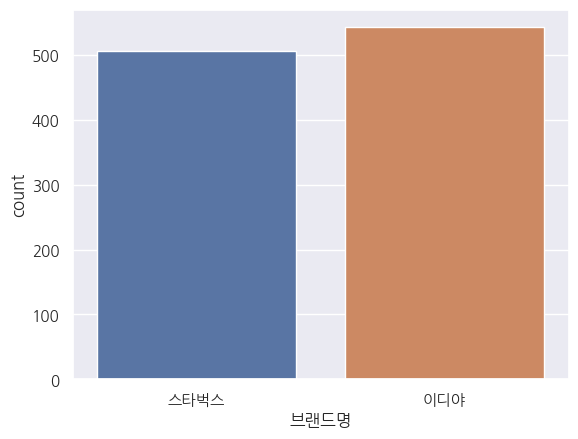

In [75]:
sns.countplot(data=df_cafe, x='브랜드명', hue='브랜드명')

plt.show()

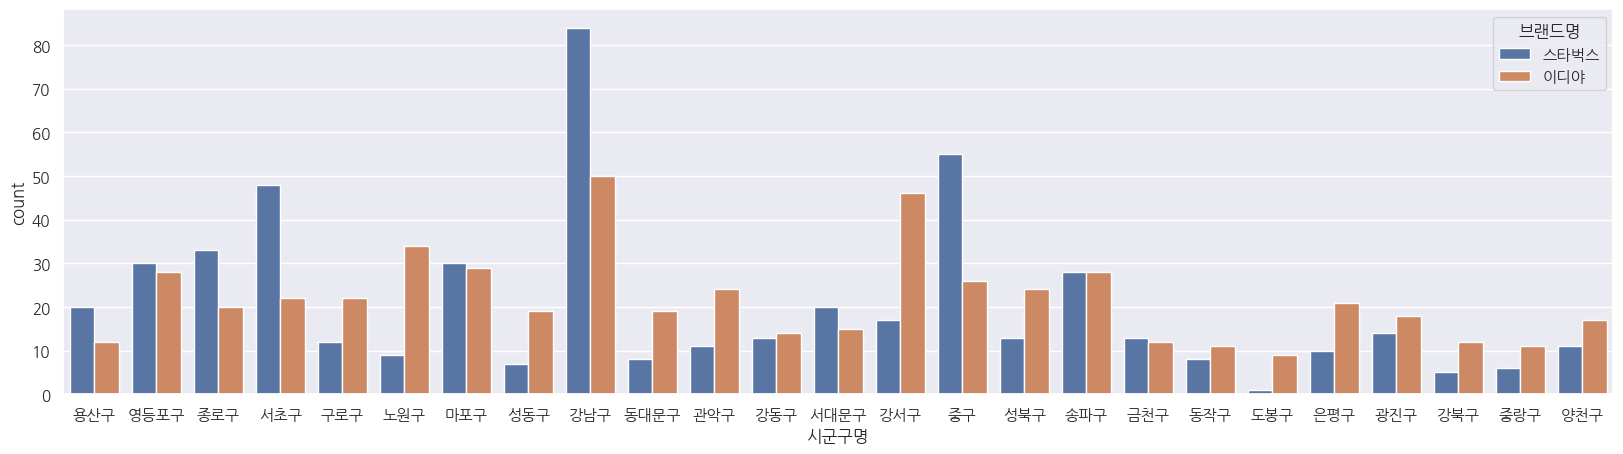

In [57]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df_cafe, x='시군구명', hue='브랜드명')

plt.show()

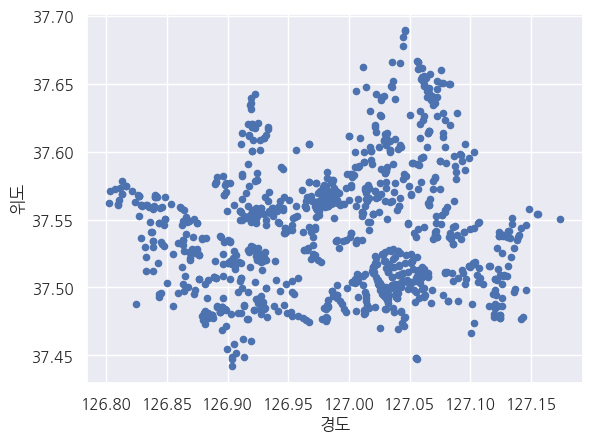

In [58]:
# pandas로 scatterplot을 그려봅니다.
df_cafe[["위도", "경도"]].plot.scatter(x="경도", y="위도")

plt.show()

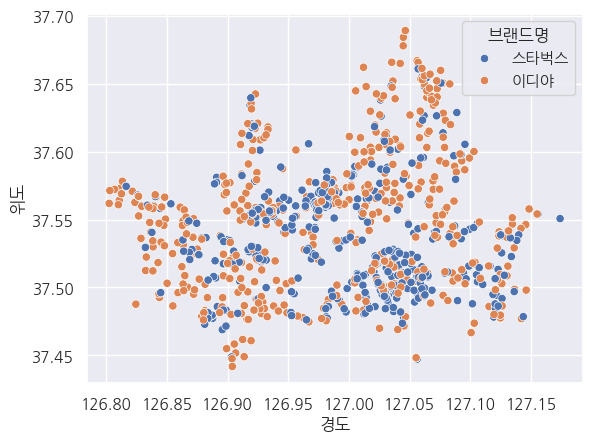

In [59]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.
sns.scatterplot(data=df_cafe, x="경도", y="위도", hue="브랜드명")

plt.show()

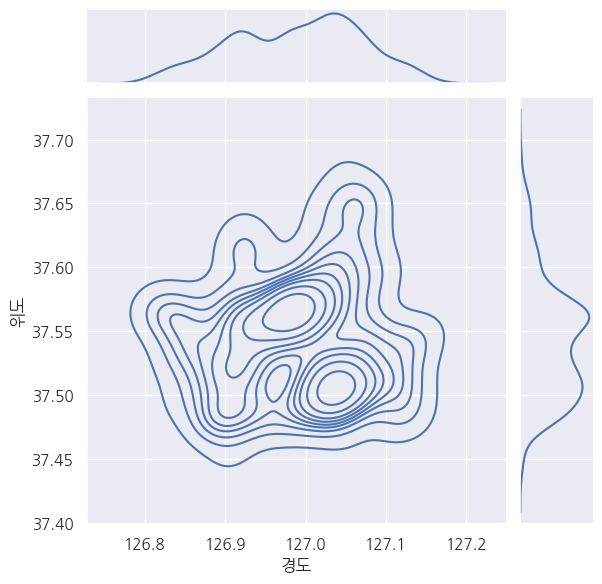

In [60]:
# jointplot 그리기
sns.jointplot(data=df_cafe, x="경도", y="위도", kind="kde")

plt.show()

In [37]:
# 구별로 그룹핑
df_cafe_vs = df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count()
df_cafe_vs.head()

시군구명  브랜드명
강남구   스타벅스    84
      이디야     50
강동구   스타벅스    13
      이디야     14
강북구   스타벅스     5
Name: 상호명, dtype: int64

In [38]:
df_cafe_vs = df_cafe_vs.reset_index()
df_cafe_vs.tail()

,시군구명,브랜드명,상호명
45,종로구,이디야,20
46,중구,스타벅스,55
47,중구,이디야,26
48,중랑구,스타벅스,6
49,중랑구,이디야,11


In [39]:
df_cafe_vs = df_cafe_vs.rename(columns={'시군구명':'구', '브랜드명':'브랜드명', '상호명':'매장수'})
df_cafe_vs.tail()

,구,브랜드명,매장수
45,종로구,이디야,20
46,중구,스타벅스,55
47,중구,이디야,26
48,중랑구,스타벅스,6
49,중랑구,이디야,11


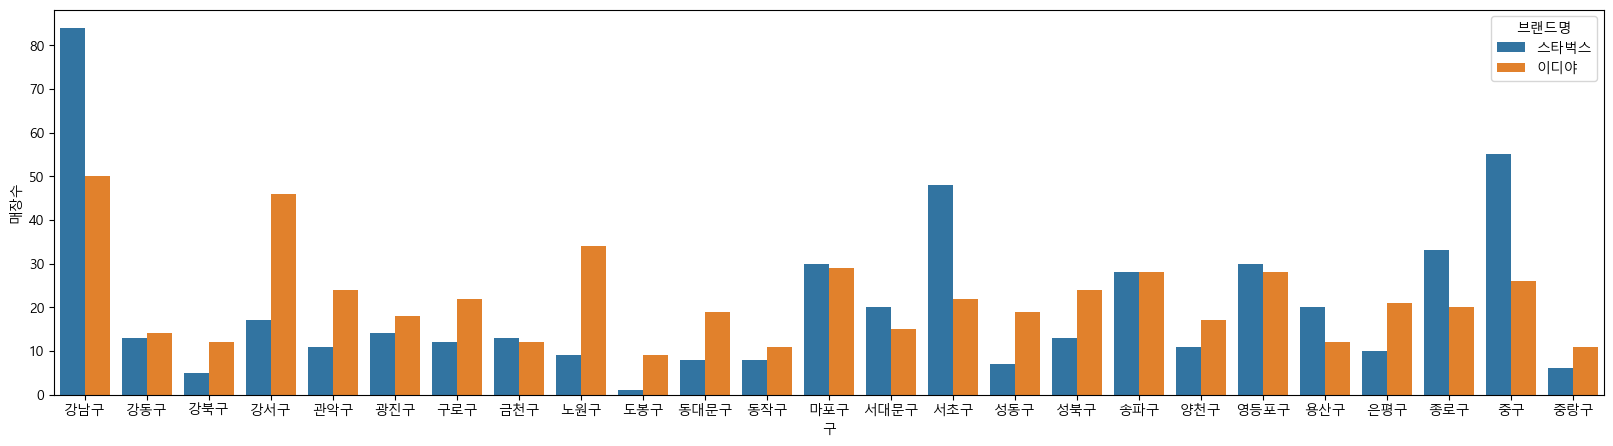

In [41]:
# seaborn의 barplot 을 활용해 구별 매장수를 시각화 합니다.
plt.figure(figsize=(20, 5))
sns.barplot(data=df_cafe_vs, x='구', y='매장수', hue='브랜드명')

plt.show()

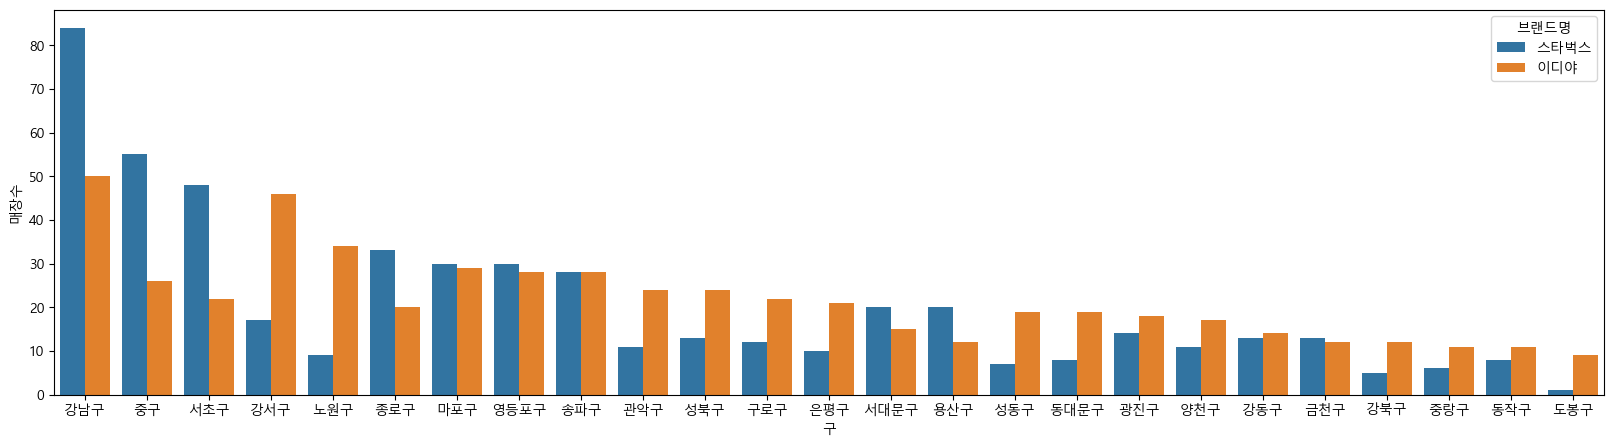

In [42]:
# seaborn의 barplot 을 활용해 구별 매장수를 시각화 합니다.
plt.figure(figsize=(20, 5))
sns.barplot(data=df_cafe_vs.sort_values('매장수', ascending=False), x='구', y='매장수', hue='브랜드명')

plt.show()

#### 지도 시각화

In [43]:
import folium

In [44]:
lat = df_cafe['위도'].mean()
long = df_cafe['경도'].mean()
(lat, long)

(np.float64(37.54290075880839), np.float64(126.98843376360101))

In [45]:
df_cafe

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
1104,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,용산구,이태원1동,이태원동,서울특별시 용산구 이태원로 188,126.994781,37.534303,스타벅스,스타벅스
1675,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,신길1동,신길동,서울특별시 영등포구 영등포로 353,126.918062,37.515118,이디야커피,이디야
2023,스타벅스종로3가점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,종로1.2.3.4가동,종로3가,서울특별시 종로구 종로 113-1,126.990207,37.570585,스타벅스종로3가점,스타벅스
2770,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,잠원동,잠원동,서울특별시 서초구 강남대로 581,127.019763,37.513663,스타벅스,스타벅스
2957,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,구로구,구로3동,구로동,서울특별시 구로구 디지털로32길 43,126.897870,37.484385,이디야커피,이디야
...,...,...,...,...,...,...,...,...,...,...,...,...,...
567090,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,관악구,낙성대동,봉천동,서울특별시 관악구 관악로 158,126.952792,37.479298,스타벅스,스타벅스
567828,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,성동구,금호4가동,금호동4가,서울특별시 성동구 동호로 99,127.015329,37.548028,스타벅스,스타벅스
568636,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,양재1동,우면동,서울특별시 서초구 바우뫼로 20,127.025274,37.469980,이디야커피,이디야
570096,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서대문구,북아현동,북아현동,서울특별시 서대문구 북아현로 29,126.956144,37.560080,스타벅스,스타벅스


In [61]:
map = folium.Map(location=[lat, long], zoom_start=12)

for i in df_cafe.index:
    shop_lat = df_cafe.loc[i, '위도']
    shop_long = df_cafe.loc[i, '경도']
    title = f"{df_cafe.loc[i, '상호명']} - {df_cafe.loc[i, '도로명주소']}"

    color = 'blue'
    if df_cafe.loc[i, '브랜드명'] == '이디야': color = 'orange'

    folium.CircleMarker(location=[shop_lat,shop_long], radius=3, color=color, tooltip=title).add_to(map)

map

In [48]:
geo_path = './data/seoul_municipalities_geo_simple.json'

import json
geo_json = json.load(open(geo_path, encoding="utf-8"))

In [49]:
geo_json["features"][0]['properties']["name"]

'강동구'

In [50]:
df_star = df_cafe_vs[df_cafe_vs["브랜드명"] == "스타벅스"].copy()
df_star.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
2,강동구,스타벅스,13
4,강북구,스타벅스,5
6,강서구,스타벅스,17
8,관악구,스타벅스,11


In [51]:
# df_cafe_starbucks 로 스타벅스 매장 수 구하기
# choropleth의 색상은 fill_color = 'YlGn'을 사용합니다.

m = folium.Map([lat, long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_star,
    columns=['구', '매장수'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='스타벅스 매장수'
).add_to(m)

m